In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/DASA/Project/CSV/

/gdrive/.shortcut-targets-by-id/16XLNTfd7JZ0ugypjy9uXEiRWDREctkI1/DASA/Project/CSV


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
np.random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the data and creates a pandas DataFrame
df = pd.read_csv("Crop_recommendation.csv",
                            dtype={0:int, 1:int, 2:int, 3: float, 4: float, 5: float, 6: float, 7: str } )

df.columns = ["N", "P", "K", "Temperature", "Humidity", "Ph", "Rainfall", "Colture"]

df.head()


N   P   K  Temperature   Humidity        Ph    Rainfall Colture
0  90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340    rice

In [ ]:
#Retrieve the length of the dataset
len(df)

2200

In [ ]:
#Description of the Dataset
df.describe()

N            P            K  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                Ph     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

**Definition of Y and X**

In [ ]:
y = pd.DataFrame(data=df.Colture, columns=['Colture'])
print(y.shape)

(2200, 1)


In [ ]:
X_variables = df.columns.drop("Colture")
X_variables

Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'Ph', 'Rainfall'], dtype='object')

In [ ]:
data = df.drop("Colture", axis =1)
data.head()

N   P   K  Temperature   Humidity        Ph    Rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [ ]:
X = pd.DataFrame(data= data, columns= X_variables)
print(X.shape)
display(X.head())

(2200, 7)


N   P   K  Temperature   Humidity        Ph    Rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [ ]:
# Check how many samples with missing values there are

np.any(df.isna(),axis=1).sum()

0

In [ ]:
#Check which are our labels

coltures = np.unique(df["Colture"])

print(coltures)

print(len(coltures))

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
22


In [ ]:
df.dtypes

N                int64
P                int64
K                int64
Temperature    float64
Humidity       float64
Ph             float64
Rainfall       float64
Colture         object
dtype: object

In [ ]:
#How many rows for each crop?

print("The distribution for each crop is:\n{}".format(df["Colture"].value_counts()))

The distribution for each crop is:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: Colture, dtype: int64


So, all the labels have the same number of rows

In [ ]:
from numpy.ma.extras import median

pivot_median = pd.pivot_table(df,index=["Colture"],aggfunc=[max, min])
pivot_median

max                                                   \
              Humidity    K    N    P        Ph    Rainfall Temperature   
Colture                                                                   
apple        94.920481  205   40  145  6.499227  124.983162   23.996862   
banana       84.978492   55  120   95  6.490074  119.847970   29.908885   
blackgram    69.961000   25   60   80  7.775306   74.915595   34.946616   
chickpea     19.969789   85   60   80  8.868741   94.781896   20.995022   
coconut      99.981876   35   40   30  6.470466  225.632366   29.869083   
coffee       69.948073   35  120   40  7.493192  199.473564   27.923744   
cotton       84.876690   25  140   60  7.994680   99.931008   25.992374   
grapes       83.983517  205   40  145  6.499605   74.915062   41.948657   
jute         89.891065   45  100   60  7.488014  199.836291   26.985822   
kidneybeans  24.969699   25   40   80  5.998125  149.744103   24.923601   
lentil       69.923759   25   40   80  7.841496   54.939377   29.944139   
maize        74.829137   25  100   60  6.995844  109.751538   26.549864   
mango        54.964053   35   40   40  6.967418  100.812466   35.990097   
mothbeans    64.955854   25   40   60  9.935091   74.443307   31.999286   
mungbean     89.996156   25   40   60  7.199495   59.872321   29.914544   
muskmelon    94.962187   55  120   30  6.781050   29.866814   29.943492   
orange       94.964199   15   40   30  7.995849  119.694658   34.906653   
papaya       94.944821   55   70   70  6.993473  248.859299   43.675493   
pigeonpeas   69.691413   25   40   80  7.445445  198.829881   36.977944   
pomegranate  94.998975   45   40   30  7.199504  112.475094   24.962732   
rice         84.969072   45   99   60  7.868475  298.560117   26.929951   
watermelon   89.984052   55  120   30  6.956509   59.759800   26.986037   

                   min                                                   
              Humidity    K    N    P        Ph    Rainfall Temperature  
Colture                                                                  
apple        90.025751  195    0  120  5.514253  100.117344   21.036527  
banana       75.031933   45   80   70  5.505394   90.109781   25.010185  
blackgram    60.065349   15   20   55  6.500145   60.417903   25.097374  
chickpea     14.258040   75   20   55  5.988993   65.113656   17.024985  
coconut      90.017345   25    0    5  5.501580  131.090008   25.008724  
coffee       50.045570   25   80   15  6.020947  115.156401   23.059519  
cotton       75.005393   15  100   35  5.801048   60.653817   22.000851  
grapes       80.016394  195    0  120  5.510925   65.010953    8.825675  
jute         70.882596   35   60   35  6.002525  150.235524   23.094338  
kidneybeans  18.092240   15    0   55  5.502999   60.275525   15.330426  
lentil       60.091166   15    0   55  5.916454   35.034848   18.064861  
maize        55.282204   15   60   35  5.513698   60.651715   18.041855  
mango        45.022364   25    0   15  4.507524   89.291476   27.003155  
mothbeans    40.009334   15    0   35  3.504752   30.920140   24.018254  
mungbean     80.034996   15    0   35  6.218924   36.120429   27.014704  
muskmelon    90.015064   45   80    5  6.002927   20.211267   27.024151  
orange       90.006217    5    0    5  6.010392  100.173796   10.010813  
papaya       90.038631   45   31   46  6.501521   40.351531   23.012402  
pigeonpeas   30.400468   15    0   55  4.548202   90.054227   18.319104  
pomegranate  85.129122   35    0    5  5.561852  102.518476   18.071330  
rice         80.122675   35   60   35  5.005307  182.561632   20.045414  
watermelon   80.026213   45   80    5  6.000976   40.126504   24.043558

In [ ]:
from numpy.ma.extras import median

pivot_median = pd.pivot_table(df,index=["Colture"],aggfunc=median)
pivot_median


Humidity      K      N      P        Ph    Rainfall  Temperature
Colture                                                                       
apple        92.416541  200.0   24.0  136.5  5.885818  112.979230    22.628290
banana       80.223599   50.0  100.5   81.0  5.994462  105.007750    27.443333
blackgram    65.026723   19.0   41.0   67.0  7.165240   68.293539    29.655515
chickpea     16.658634   79.0   39.0   68.0  7.356537   79.692282    18.878291
coconut      94.960581   31.0   24.0   15.5  5.990709  171.999922    27.385317
coffee       57.648083   30.0  103.0   29.0  6.798626  157.770963    25.656643
cotton       80.010893   19.0  117.0   46.0  6.840957   80.237095    23.964997
grapes       81.724647  201.0   24.0  133.0  6.001785   69.536186    23.018528
jute         79.469205   40.0   78.0   46.0  6.711500  175.590814    24.971106
kidneybeans  21.348735   20.0   22.0   67.0  5.745283  107.399392    19.924037
lentil       64.094626   19.0   16.5   68.0  6.954178   46.553255    24.946835
maize        65.303845   20.0   76.0   48.5  6.259181   83.471553    22.844456
mango        50.281615   30.0   21.0   27.5  5.743385   94.905973    31.300223
mothbeans    53.668190   20.0   22.0   48.5  7.219136   51.182738    28.370863
mungbean     85.953767   20.0   22.0   47.0  6.703890   49.028171    28.441673
muskmelon    92.111116   50.0  100.0   18.0  6.353033   24.721512    28.851775
orange       91.963246   10.0   19.0   16.0  7.022614  110.684073    22.901055
papaya       92.681086   50.0   49.0   60.0  6.740830  139.000698    33.262870
pigeonpeas   47.195180   20.0   20.0   69.5  5.690466  154.310507    28.931707
pomegranate  89.911979   40.0   18.0   20.0  6.430715  107.588201    22.354425
rice         82.189357   40.0   80.0   47.0  6.363804  233.119859    23.734837
watermelon   85.030605   50.5   99.0   17.5  6.469926   50.671903    25.603965

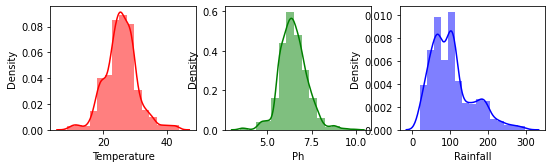

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(2, 4, 1)
sns.distplot(df['Temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 4, 2)
sns.distplot(df['Ph'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 4, 3)
sns.distplot(df['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.5})


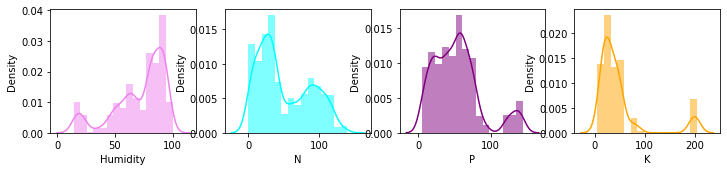

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(2, 4, 1)
sns.distplot(df['Humidity'],color="violet",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 4, 2)
sns.distplot(df['N'],color= "cyan" ,bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 4, 3)
sns.distplot(df['P'],color="purple",bins=15,hist_kws={'alpha':0.5})
plt.subplot(2, 4, 4)
sns.distplot(df['K'],color="orange",bins=15,hist_kws={'alpha':0.5})

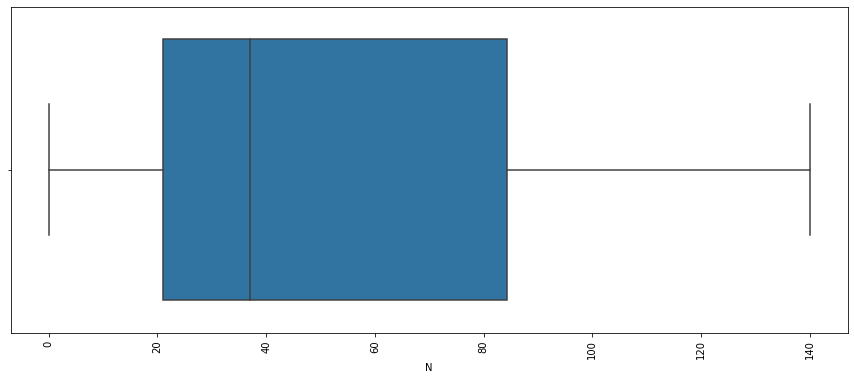

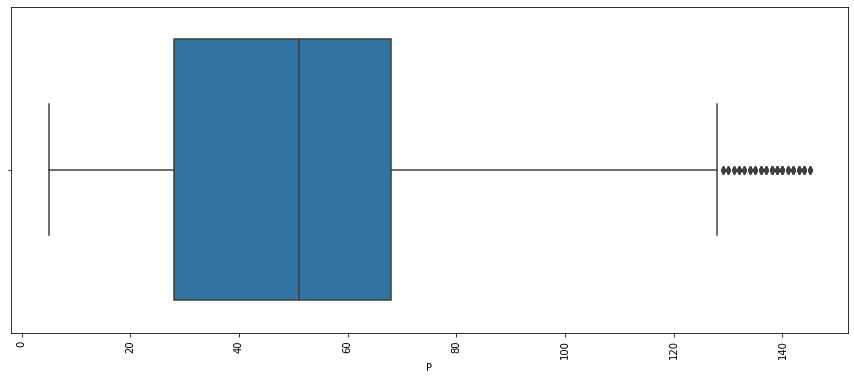

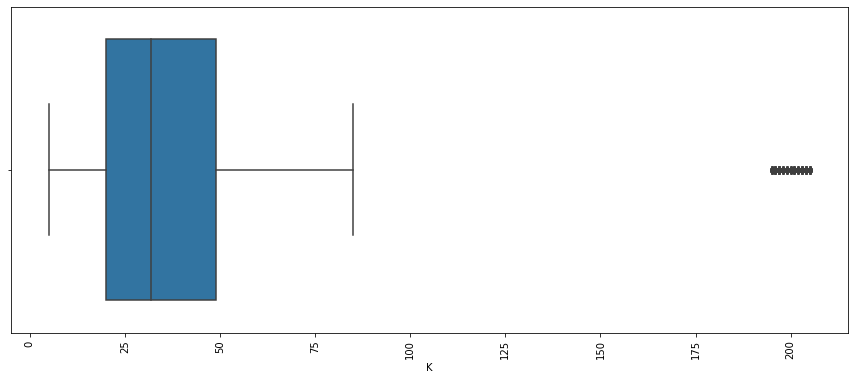

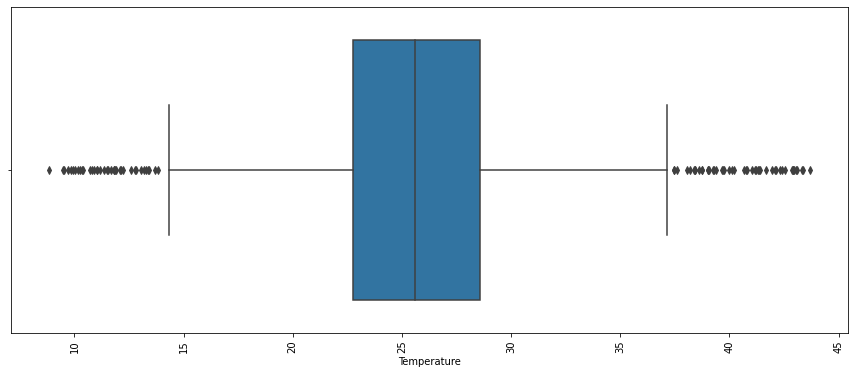

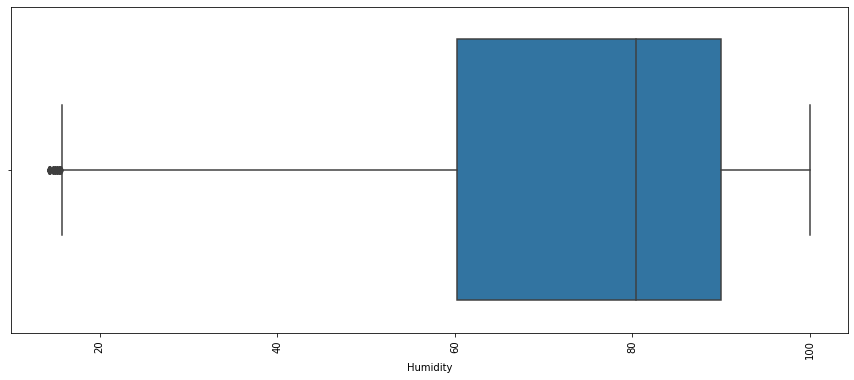

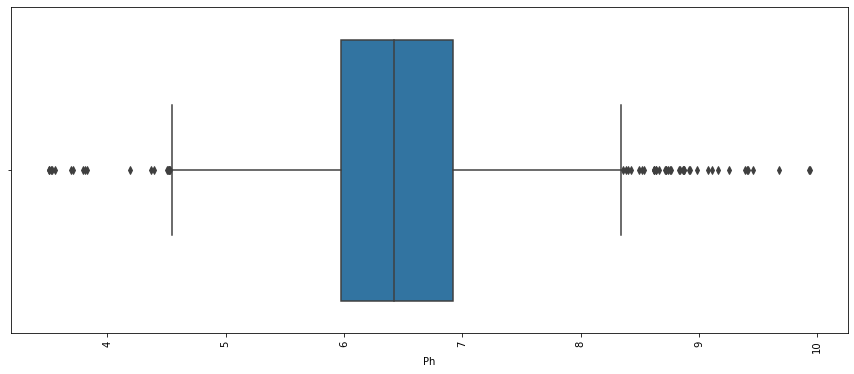

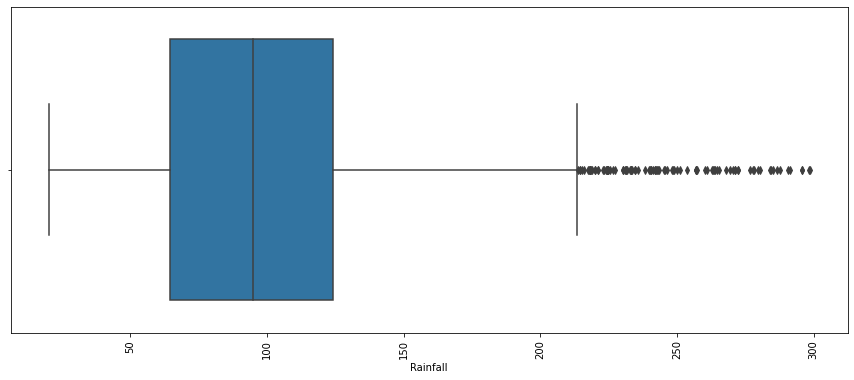

In [ ]:
for i in X.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(X[i])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
def percentile(df):

  X = df.drop("Colture", axis = 1)

  _out_upp = pd.DataFrame()
  _out_low = pd.DataFrame()

  _temp_out_upp = pd.DataFrame()
  _temp_out_low = pd.DataFrame()

  local_outlier = pd.DataFrame()
  outliers = pd.DataFrame()

  for i in X.columns:
    print("{} \n\n".format(i))

    Q1=np.percentile(df[i],25,interpolation='midpoint')

    Q3=np.percentile(df[i],75,interpolation='midpoint')

    IQR = Q3-Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    low_df = df[df[i]<lower_bound].groupby("Colture").agg({ "Colture" : pd.Series.value_counts } )
    upp_df = df[df[i]>upper_bound].groupby("Colture").agg({ "Colture" : pd.Series.value_counts } )

    lowers_df = df[df[i] < lower_bound]
    uppers_df = df[df[i] > upper_bound]

    lowers = lowers_df["Colture"].tolist()
    uppers = uppers_df["Colture"].tolist()

    crop_uppers = { i : uppers.count(i) for i in uppers }
    crop_lowers = { i : lowers.count(i) for i in lowers }

    print("For {} feature the data over the Lower Bound : {} ".format(i,len(lowers)))
    print("Lower values correspond to : {}".format( crop_lowers ))

    print("For {} feature the data over the Upper Bound : {} ".format(i,len(uppers)))
    print("Upper values correspond to : {} \n\n".format( crop_uppers ))

    print("\n\nSTART Upper\n\n")

    for i in crop_uppers:
      if( crop_uppers[i] < 25 ):
        #print(uppers_df["Colture"])
        #print("-------> {} ".format(i))
        _temp_out_upp = uppers_df[uppers_df["Colture"] == str(i) ]
        _out_upp = pd.concat([ _temp_out_upp , _out_upp ])

    print(_out_upp)
    print("\n\n END Upper\n\n")
    
    print("\n\n START Lower\n\n")

    for i in crop_lowers:
      if( crop_lowers[i] < 25 ):
        #print(uppers_df["Colture"])
        #print("-------> {} ".format(i))
        _temp_out_low = lowers_df[lowers_df["Colture"] ==  str(i) ]
        _out_low = pd.concat([ _temp_out_low , _out_low ])
    
    print(_out_low)
    print("\n\n END Lower\n\n")

    local_outlier = pd.concat([ _out_upp , _out_low ])

    outliers = pd.concat([ outliers , local_outlier ])

    print("\n\n Outliers \n\n")
    print(outliers)
    print("\n\n End Outliers \n\n")
  return df.drop( outliers.index )



In [ ]:
new = percentile(df)

N 


For N feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For N feature the data over the Upper Bound : 0 
Upper values correspond to : {} 




START Upper


Empty DataFrame
Columns: []
Index: []


 END Upper




 START Lower


Empty DataFrame
Columns: []
Index: []


 END Lower




 Outliers 


Empty DataFrame
Columns: []
Index: []


 End Outliers 


P 


For P feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For P feature the data over the Upper Bound : 138 
Upper values correspond to : {'grapes': 68, 'apple': 70} 




START Upper


Empty DataFrame
Columns: []
Index: []


 END Upper




 START Lower


Empty DataFrame
Columns: []
Index: []


 END Lower




 Outliers 


Empty DataFrame
Columns: []
Index: []


 End Outliers 


K 


For K feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For K feature the data over the Upper Bound : 200 
Upper values correspond to : {'grapes': 100, 'apple': 100} 




START Uppe

In [ ]:
#How many rows for each crop?

print("The distribution for each crop is:\n{}".format(new["Colture"].value_counts()))

The distribution for each crop is:
rice           100
pomegranate    100
jute           100
cotton         100
apple          100
muskmelon      100
watermelon     100
maize          100
banana         100
coffee         100
lentil         100
blackgram      100
mungbean       100
pigeonpeas     100
kidneybeans    100
mango           98
chickpea        87
coconut         86
mothbeans       84
orange          83
papaya          83
grapes          66
Name: Colture, dtype: int64


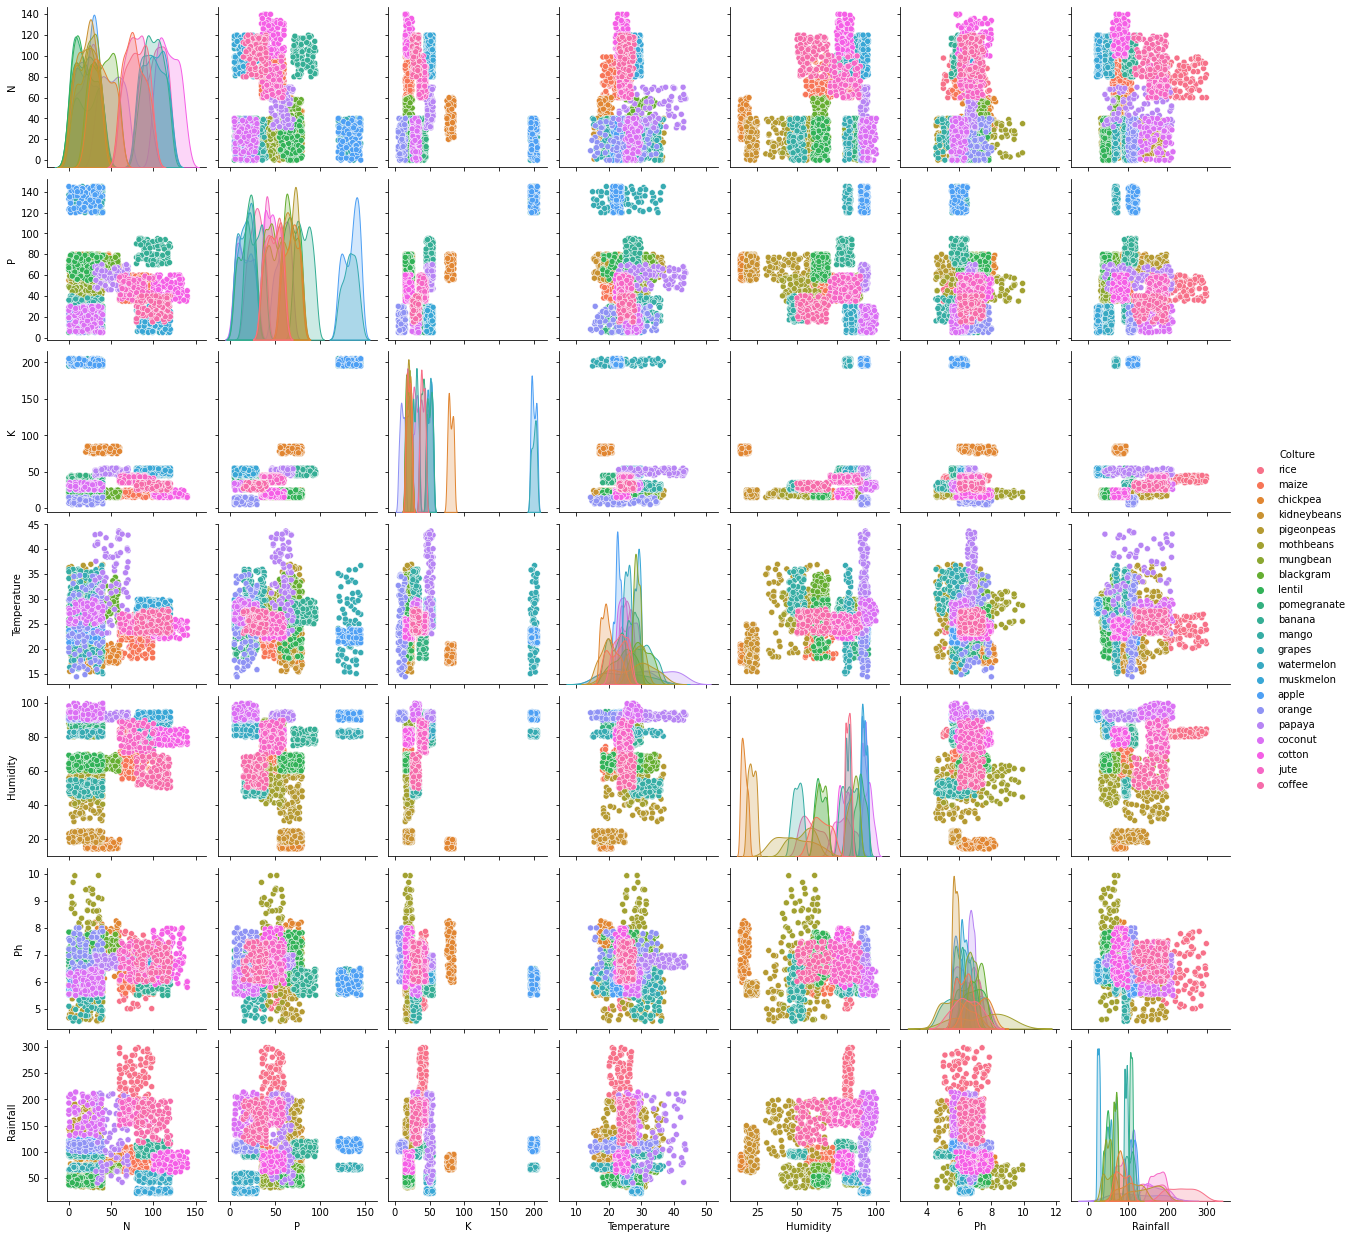

In [ ]:
X_new = new.drop("Colture", axis = 1)
y_new = new["Colture"]

new_full_df = pd.concat([X_new,y_new], axis=1)
sns.pairplot(new_full_df, hue='Colture')
plt.show()

In [ ]:
def percentile_per_crop(df):

  X = df.drop("Colture", axis = 1)
  y = df["Colture"].unique()

  _out_upp = pd.DataFrame()
  _out_low = pd.DataFrame()

  _temp_out_upp = pd.DataFrame()
  _temp_out_low = pd.DataFrame()

  local_outlier = pd.DataFrame()
  outliers = pd.DataFrame()

  for j in y:
    for i in X.columns:
      print("{} - {} \n\n".format(i,j))

      new_df = df[df["Colture"] == j ]

      Q1=np.percentile(new_df[i],25,interpolation='midpoint')
      Q3=np.percentile(new_df[i],75,interpolation='midpoint')

      IQR = Q3-Q1

      upper_bound = Q3 + 1.5 * IQR
      lower_bound = Q1 - 1.5 * IQR

      print("Q1: {} ; Q3: {} ; IQR : {} ; UP : {} ; LO_b : {}".format(Q1,Q3,IQR,upper_bound,lower_bound))


      low_df = new_df[new_df[i]<lower_bound].groupby("Colture").agg({ "Colture" : pd.Series.value_counts } )
      upp_df = new_df[new_df[i]>upper_bound].groupby("Colture").agg({ "Colture" : pd.Series.value_counts } )

      lowers_df = new_df[new_df[i] < lower_bound]
      uppers_df = new_df[new_df[i] > upper_bound]

      lowers = lowers_df["Colture"].tolist()
      uppers = uppers_df["Colture"].tolist()

      crop_uppers = { i : uppers.count(i) for i in uppers }
      crop_lowers = { i : lowers.count(i) for i in lowers }

      print("For {} feature the data over the Lower Bound : {} ".format(i,len(lowers)))
      print("Lower values correspond to : {}".format( crop_lowers ))

      print("For {} feature the data over the Upper Bound : {} ".format(i,len(uppers)))
      print("Upper values correspond to : {} \n\n".format( crop_uppers ))

      print("\n\nSTART Upper\n\n")


In [ ]:
percentile_per_crop(df)

N - rice 


Q1: 69.0 ; Q3: 91.0 ; IQR : 22.0 ; UP : 124.0 ; LO_b : 36.0
For N feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For N feature the data over the Upper Bound : 0 
Upper values correspond to : {} 




START Upper


P - rice 


Q1: 41.0 ; Q3: 54.5 ; IQR : 13.5 ; UP : 74.75 ; LO_b : 20.75
For P feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For P feature the data over the Upper Bound : 0 
Upper values correspond to : {} 




START Upper


K - rice 


Q1: 38.0 ; Q3: 42.0 ; IQR : 4.0 ; UP : 48.0 ; LO_b : 32.0
For K feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For K feature the data over the Upper Bound : 0 
Upper values correspond to : {} 




START Upper


Temperature - rice 


Q1: 21.906459875 ; Q3: 25.54148462 ; IQR : 3.635024744999999 ; UP : 30.9940217375 ; LO_b : 16.453922757500003
For Temperature feature the data over the Lower Bound : 0 
Lower values correspond to : {}
For Temperature fea

In [ ]:
# ------------------------------------------> ONE HOT ENCODING

#DO NOT NEEDED BECAUSE ONLY y IS A LABEL

'''
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

# Convert famhist into a one-hot encoding
df = onehot_feature(df, 'Colture')
df

'''

'\ndef onehot_feature(pd_data, column_name):\n    # Retrieve the unique values (the categories) and an index for each sample\n    # specifying the sample category (values[value_idx] reconstruct the original array)\n    col_values = pd_data[column_name].to_numpy().astype(\'<U\')\n    values, value_idx = np.unique(col_values, return_inverse=True)\n    n_values = values.size\n    # Create a temporary identity matrix to convert value_idx into one-hot features\n    onehots = np.eye(n_values, n_values)\n    value_onehot = onehots[value_idx]\n    # Remove the categorical feature\n    pd_data = pd_data.drop(column_name, axis=1)\n    # Add the new featues\n    for i in range(n_values):\n        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]\n        \n    return pd_data\n\n# Convert famhist into a one-hot encoding\ndf = onehot_feature(df, \'Colture\')\ndf\n\n'

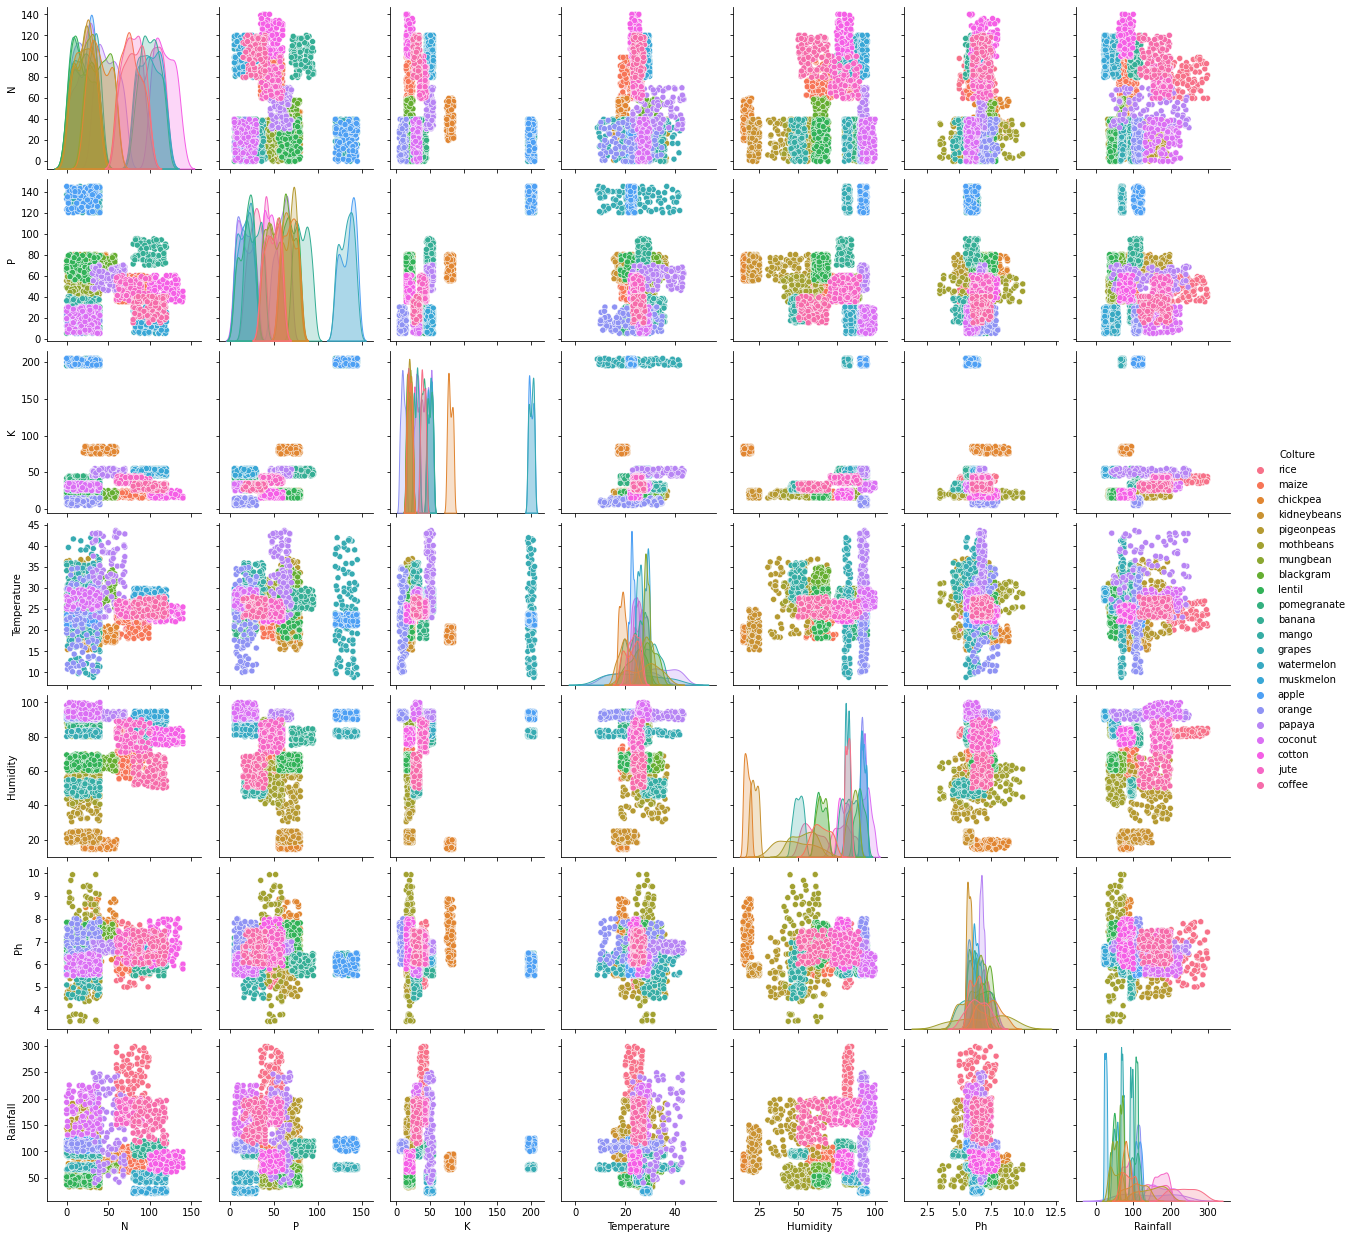

In [ ]:
full_df = pd.concat([X,y], axis=1)
sns.pairplot(full_df, hue='Colture')
plt.show()

As we can see from the previous representations:

There is an high correlation between all the NPK. Between P-K is similiar to direct proportionality. But, it seems also P-N and N-K tend to an inversal proportionality.

Then, Humidity is linear proportional correlation with N, K and Temperature. And in addition, Temperature seems correlated to P and K tending to inverse proportionality.

Also Ph seems correlated to P,K and Rainfall tending to inversal proportionality and with N tending to direct proportionality.

The less correlated feature is Rainfall.

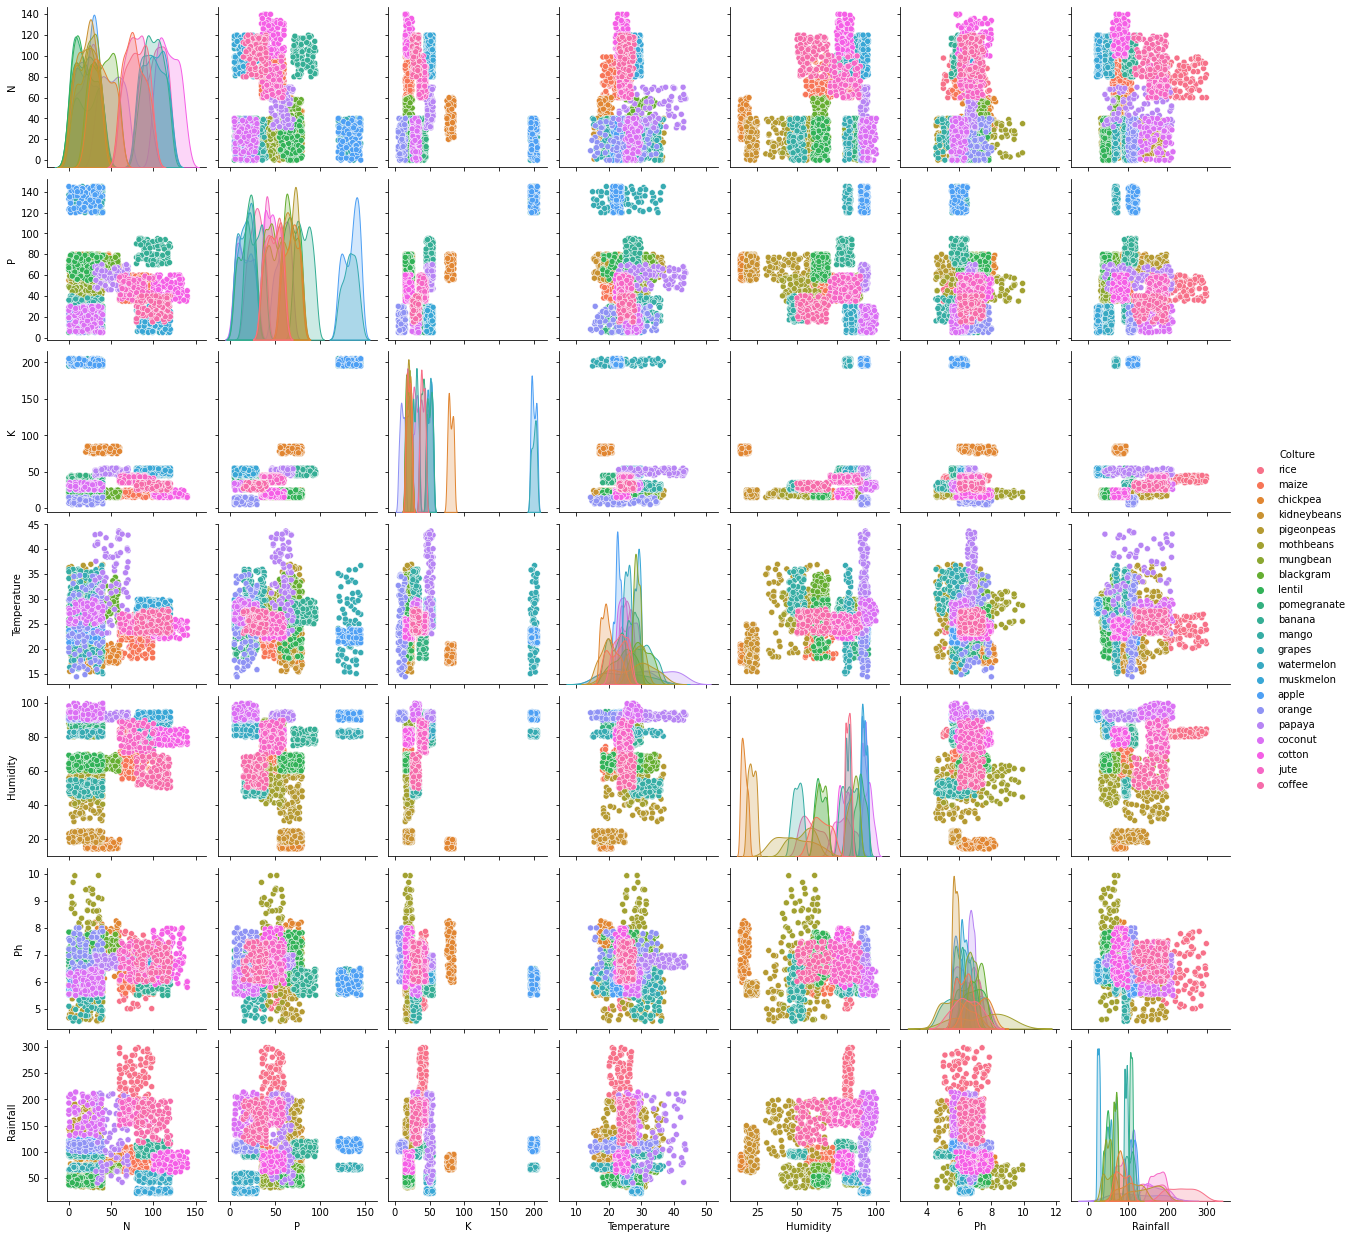

In [ ]:
full_df = pd.concat([X_new,y], axis=1)
sns.pairplot(full_df, hue='Colture')
plt.show()

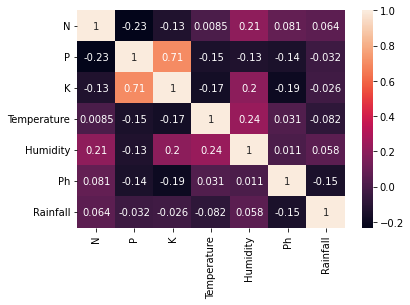

In [ ]:
sns.heatmap(X_new.corr(), annot = True)

In [ ]:
pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
median_df=pivot_median.reset_index()
median_df

Colture   Humidity      K      N      P        Ph    Rainfall  \
0         apple  92.416541  200.0   24.0  136.5  5.885818  112.979230   
1        banana  80.223599   50.0  100.5   81.0  5.994462  105.007750   
2     blackgram  65.026723   19.0   41.0   67.0  7.165240   68.293539   
3      chickpea  16.658634   79.0   39.0   68.0  7.356537   79.692282   
4       coconut  94.960581   31.0   24.0   15.5  5.990709  171.999922   
5        coffee  57.648083   30.0  103.0   29.0  6.798626  157.770963   
6        cotton  80.010893   19.0  117.0   46.0  6.840957   80.237095   
7        grapes  81.724647  201.0   24.0  133.0  6.001785   69.536186   
8          jute  79.469205   40.0   78.0   46.0  6.711500  175.590814   
9   kidneybeans  21.348735   20.0   22.0   67.0  5.745283  107.399392   
10       lentil  64.094626   19.0   16.5   68.0  6.954178   46.553255   
11        maize  65.303845   20.0   76.0   48.5  6.259181   83.471553   
12        mango  50.281615   30.0   21.0   27.5  5.743385   94.905973   
13    mothbeans  53.668190   20.0   22.0   48.5  7.219136   51.182738   
14     mungbean  85.953767   20.0   22.0   47.0  6.703890   49.028171   
15    muskmelon  92.111116   50.0  100.0   18.0  6.353033   24.721512   
16       orange  91.963246   10.0   19.0   16.0  7.022614  110.684073   
17       papaya  92.681086   50.0   49.0   60.0  6.740830  139.000698   
18   pigeonpeas  47.195180   20.0   20.0   69.5  5.690466  154.310507   
19  pomegranate  89.911979   40.0   18.0   20.0  6.430715  107.588201   
20         rice  82.189357   40.0   80.0   47.0  6.363804  233.119859   
21   watermelon  85.030605   50.5   99.0   17.5  6.469926   50.671903   

    Temperature  
0     22.628290  
1     27.443333  
2     29.655515  
3     18.878291  
4     27.385317  
5     25.656643  
6     23.964997  
7     23.018528  
8     24.971106  
9     19.924037  
10    24.946835  
11    22.844456  
12    31.300223  
13    28.370863  
14    28.441673  
15    28.851775  
16    22.901055  
17    33.262870  
18    28.931707  
19    22.354425  
20    23.734837  
21    25.603965

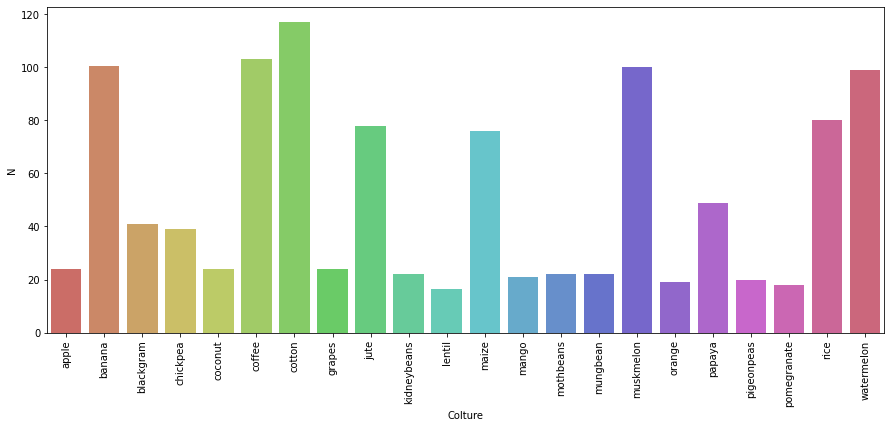

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='Colture',data=median_df,palette='hls')
plt.xticks(rotation=90)
plt.show()

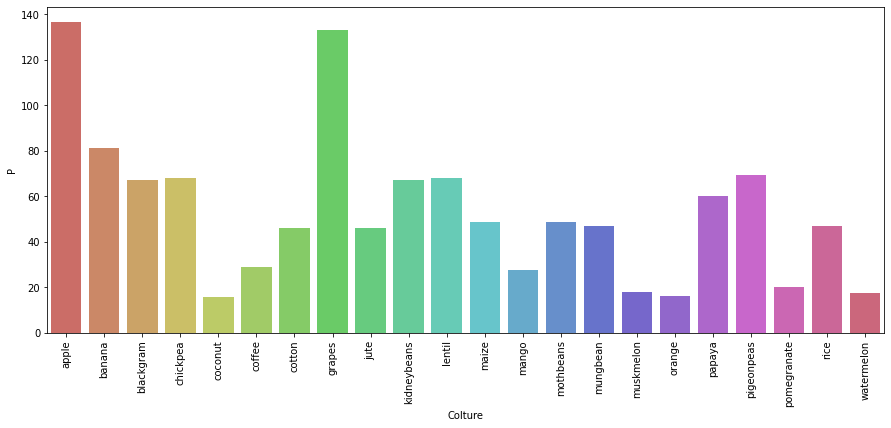

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='Colture',data=median_df,palette='hls')
plt.xticks(rotation=90)
plt.show()

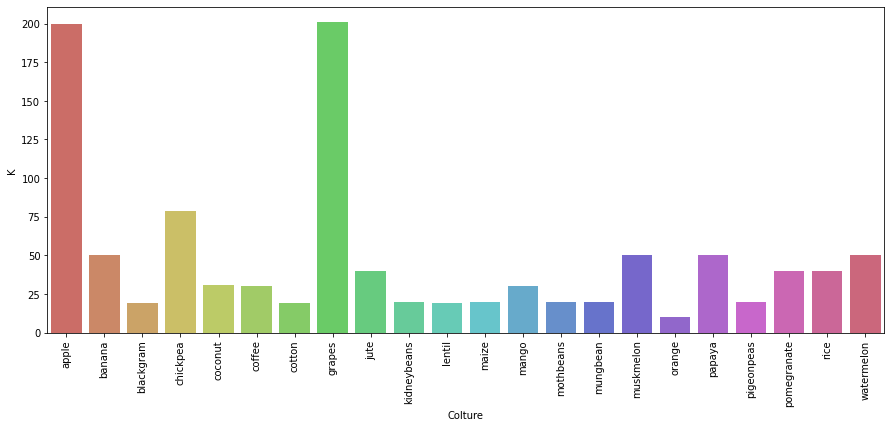

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='K',x='Colture',data=median_df,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Comparison between NPK values

fig = go.Figure()
fig.add_trace(go.Bar(x=median_df["Colture"],y=median_df['N'],name='N',marker_color='red'))
fig.add_trace(go.Bar(x=median_df["Colture"],y=median_df['P'],name='P',marker_color='green'))
fig.add_trace(go.Bar(x=median_df["Colture"],y=median_df['K'],name='K',marker_color='blue'))
fig.update_layout(plot_bgcolor='white', 
barmode='group', 
xaxis_tickangle=-45)
fig.show()

In [ ]:
import random

In [ ]:
def ranking(df, column):

  df_N = df.sort_values(by=column, ascending=False)
    
  fig = make_subplots(rows=1, cols=2)

  top = {
      'y' : df_N[column][0:11].sort_values().index,
      'x' : df_N[column][0:11].sort_values()
  }

  last = {
      'y' : df_N[column][-11:].index,
      'x' : df_N[column][-11:]
  }

  fig.add_trace(
      go.Bar(top,
            name="Most {} required".format(str(column)),
            marker_color="#B5b321",
            orientation='h',
            text=top['x']),
      
      row=1, col=1
  )

  fig.add_trace(
      go.Bar(last,
            name="Least {} required".format(str(column)),
            marker_color="#108080",
            orientation='h',
            text=last['x']),
      row=1, col=2
  )
  fig.update_traces(texttemplate='%{text}', textposition='inside')
  fig.update_layout(title_text=str(column),
                    plot_bgcolor='white',
                    font_size=12, 
                    font_color='black',
                  height=500)

  fig.update_xaxes(showgrid=False)
  fig.update_yaxes(showgrid=False)
  fig.show()

In [ ]:
for j in X.columns:

  ranking(pivot_median, j)

In [ ]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=16, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

i=1
j=0

for z in median_df["Colture"]:
  j+=1
  if j == 4 : 
    j = 1
    i += 2

  crop_npk = pivot_median[pivot_median.index == z ]
  values = [crop_npk['N'][0], crop_npk['P'][0], crop_npk['K'][0]]
  fig.add_trace(go.Pie(labels=labels, values=values,name=str(z)),i, j)
  fig.update_layout(annotations=[dict(text=str(z), font_size=15, showarrow=False)])
  #fig.update_layout(title=str(z))

  fig.update_traces(hole=.4, hoverinfo="label+percent+name")
  #fig.update_layout(annotations=[dict(text=str(z), x= i* ]
   #   title_text="NPK ratio for rice, cotton, jute, maize, lentil"
      #annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
       #           dict(text='Cotton',x=0.26,y=0.8, font_size=15, showarrow=False),
        #          dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
         #         dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
          #        dict(text='Lentil',x=0.94,y=0.8, font_size=15, showarrow=False)])



In [ ]:
fig.update_layout(
    annotations=[dict(text='Apple',x=0.2,y=1.01, font_size=15, showarrow=False),
                 dict(text='Chickpea',x=0.2,y=0.9, font_size=15, showarrow=False),
                 dict(text='Cotton',x=0.2,y=0.75, font_size=15, showarrow=False),
                 dict(text='Kidneybeans',x=0.2,y=0.62, font_size=15, showarrow=False),
                 dict(text='Mango',x=0.2,y=0.46, font_size=15, showarrow=False),
                 dict(text='Muskmelon',x=0.2,y=0.33, font_size=15, showarrow=False),
                 dict(text='Pigeonbeans',x=0.2,y=0.19, font_size=15, showarrow=False),
                 dict(text='Watermelons',x=0.2,y=0.07, font_size=15, showarrow=False),
                 dict(text='Banana',x=0.6,y=1.01, font_size=15, showarrow=False),
                 dict(text='Coconut',x=0.6,y=0.9, font_size=15, showarrow=False),
                 dict(text='Grapes',x=0.6,y=0.75, font_size=15, showarrow=False),
                 dict(text='Lentil',x=0.6,y=0.62, font_size=15, showarrow=False),
                 dict(text='Mothbeans',x=0.6,y=0.46, font_size=15, showarrow=False),
                 dict(text='Orange',x=0.6,y=0.33, font_size=15, showarrow=False),
                 dict(text='Pomegranate',x=0.6,y=0.19, font_size=15, showarrow=False),
                 dict(text='Blackgram',x=1.01,y=1.01, font_size=15, showarrow=False),
                 dict(text='Coffee',x=1.01,y=0.9, font_size=15, showarrow=False),
                 dict(text='Jute',x=1.01,y=0.75, font_size=15, showarrow=False),
                 dict(text='Maize',x=1.01,y=0.62, font_size=15, showarrow=False),
                 dict(text='Mungbeans',x=1.01,y=0.46, font_size=15, showarrow=False),
                 dict(text='Papaya',x=1.01,y=0.33, font_size=15, showarrow=False),
                 dict(text='Rice',x=1.01,y=0.19, font_size=15, showarrow=False),]
                  )
fig.show()

In [ ]:
fig=px.scatter(new,x="Humidity",y="Rainfall",color="Colture",symbol="Colture")
fig.update_layout(plot_bgcolor='black')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

 **Try to disassociate values in the low right edge**

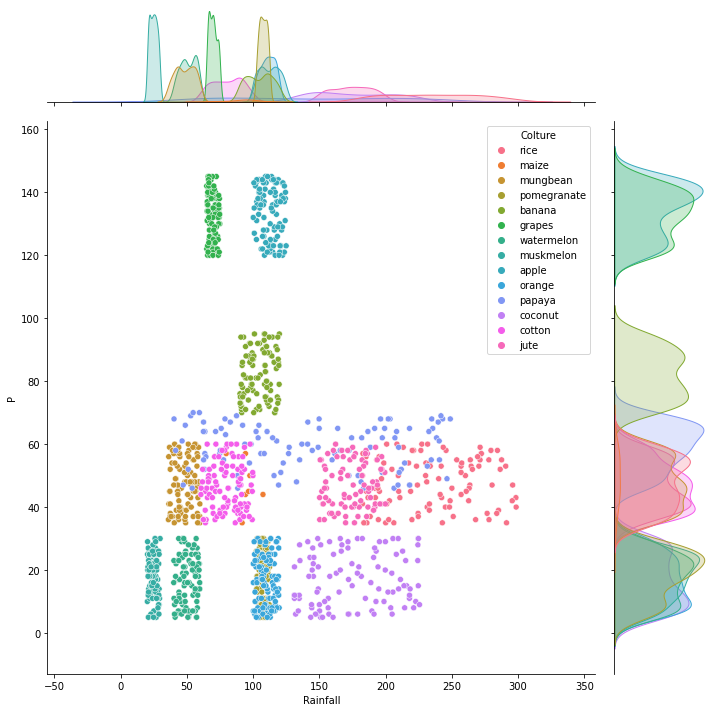

In [ ]:
sns.jointplot(x="Rainfall",y="P",data=df[(df['Humidity']>73)],height=10,hue="Colture")

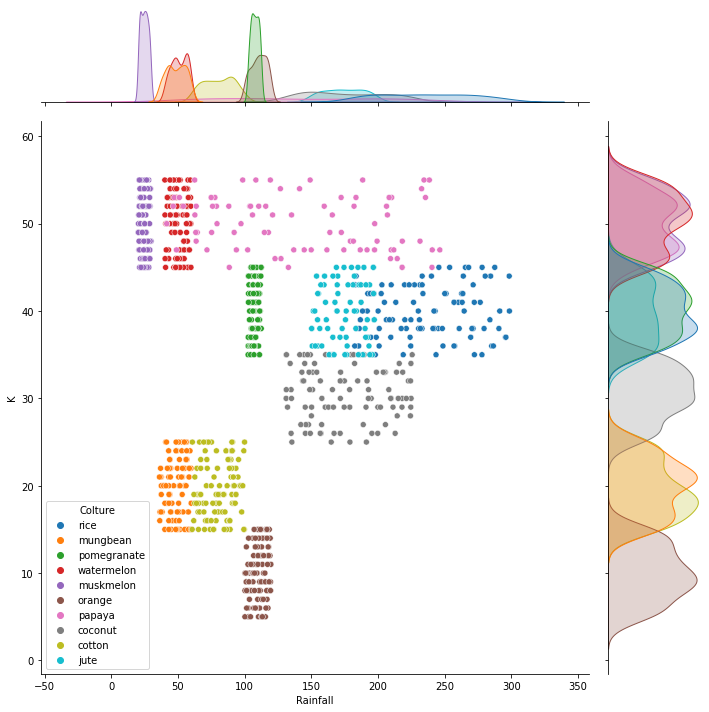

In [ ]:
sns.jointplot(x="Rainfall",y="K",data=df[(df['Humidity']>75) & (df["P"] < 67) ],height=10,hue="Colture")

**Try to disassociate the middle figure**

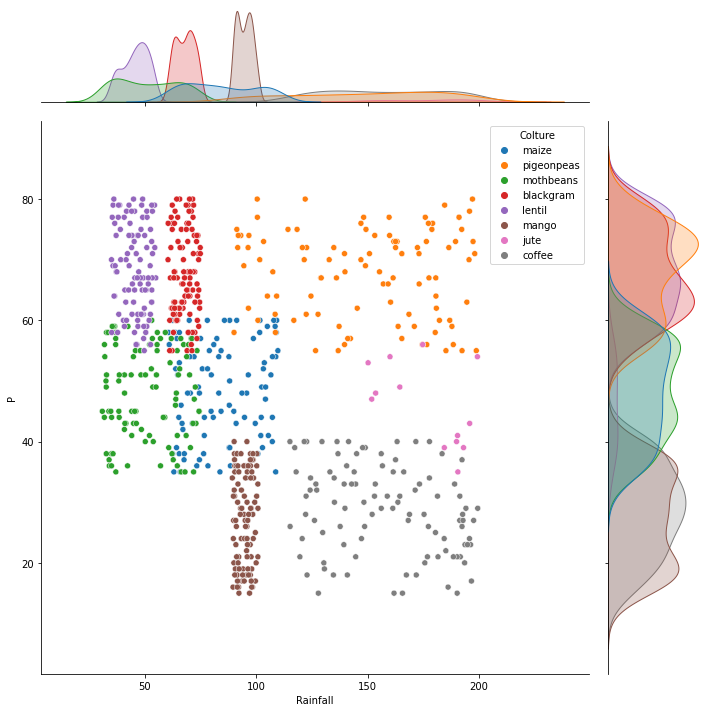

In [ ]:
sns.jointplot(x="Rainfall",y="P",data=df[(df['Humidity']<73) & (df['Humidity']>30) ],height=10,hue="Colture")

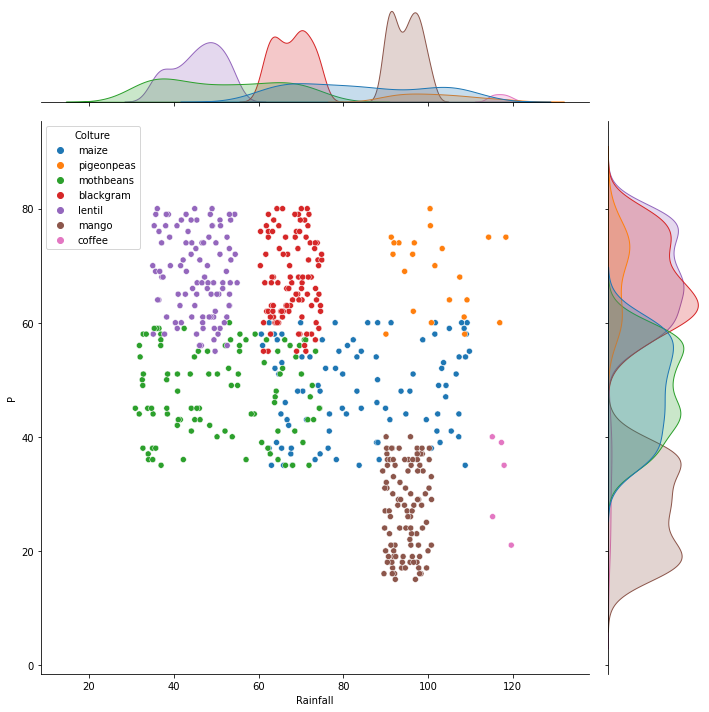

In [ ]:
sns.jointplot(x="Rainfall",y="P",data=df[(df['Humidity']<73) & (df['Humidity']>30) & (df["Rainfall"]<120) ],height=10,hue="Colture")

In [ ]:
'''for j in median_df["Colture"]:

  next = df[df["Colture"] == j]

  plt.figure(figsize=(8,5))
  plt.title(str(j))
  plt.xlabel("")
  plt.ylabel("")
  
  plt.subplot(1, 1, 1)
  sns.distplot(next['Temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
  plt.subplot(1, 1, 1)
  sns.distplot(next['Humidity'],color="green",bins=15,hist_kws={'alpha':0.5})
  plt.subplot(1, 1, 1)
  sns.distplot(next['Rainfall'],color="blue",bins=15,hist_kws={'alpha':0.5})
'''


'for j in median_df["Colture"]:\n\n  next = df[df["Colture"] == j]\n\n  plt.figure(figsize=(8,5))\n  plt.title(str(j))\n  plt.xlabel("")\n  plt.ylabel("")\n  \n  plt.subplot(1, 1, 1)\n  sns.distplot(next[\'Temperature\'],color="red",bins=15,hist_kws={\'alpha\':0.5})\n  plt.subplot(1, 1, 1)\n  sns.distplot(next[\'Humidity\'],color="green",bins=15,hist_kws={\'alpha\':0.5})\n  plt.subplot(1, 1, 1)\n  sns.distplot(next[\'Rainfall\'],color="blue",bins=15,hist_kws={\'alpha\':0.5})\n'

In [ ]:
#features = new[["N","P","K","Temperature","Humidity","Ph","Rainfall"]]
#target = new[["Colture"]]
#labels = new[["Colture"]]

**MODEL STRUCTURE**

In [ ]:
df.head()

N   P   K  Temperature   Humidity        Ph    Rainfall Colture
0  90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340    rice

In [ ]:
features = X
target = y
labels = y

In [ ]:
y = df['Colture'].to_numpy().astype(np.string_)

X_full_feat = ['Ph', 'Humidity', 'Temperature', 'Rainfall', 'N', 'P', 'K']
X_full = df[X_full_feat]

 **LOGISTIC REGRESSION**

In [ ]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

In [ ]:
split_seed = 42
split_test_size = 0.3

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
# Train a logistic regressor that uses all features

X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=split_test_size, 
                                                    random_state=split_seed)

In [ ]:
from sklearn.linear_model import LogisticRegression   
l1_ratio = 0.5
C=1.00
                                                                                # 1- model selection
model = LogisticRegression(solver="newton-cg", penalty='none')  
clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
clf_en_LR = LogisticRegression(
    C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
)


                                                                                # 2- hyperparams

model.fit(X_full_train, y_train)                                                # 3- model fitting
clf_l1_LR.fit(X_full_train, y_train)
clf_l2_LR.fit(X_full_train, y_train)
clf_en_LR.fit(X_full_train, y_train)


# 4- model testing
y_predict = model.predict(X_full_train)                                         

print("Train accuracy:", accuracy(y_train, model.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, model.predict(X_full_test)))

y_predict = clf_l1_LR.predict(X_full_train)                                         

print("Train accuracy:", accuracy(y_train, clf_l1_LR.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, clf_l1_LR.predict(X_full_test)))

y_predict = clf_l2_LR.predict(X_full_train)                                     

print("Train accuracy:", accuracy(y_train, clf_l2_LR.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, clf_l2_LR.predict(X_full_test)))

y_predict = clf_en_LR.predict(X_full_train)                                         

print("Train accuracy:", accuracy(y_train, clf_en_LR.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, clf_en_LR.predict(X_full_test)))

Train accuracy: 0.9928571428571429
Test accuracy: 0.9696969696969697
Train accuracy: 0.9467532467532468
Test accuracy: 0.9227272727272727
Train accuracy: 0.9461038961038961
Test accuracy: 0.9212121212121213
Train accuracy: 0.9467532467532468
Test accuracy: 0.9212121212121213


**DECISION TREE**

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=3,max_depth=7)
                                                                                    
DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  98.03030303030303
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       0.97      1.00      0.98        29
   blackgram       0.91      0.97      0.94        31
    chickpea       1.00      1.00      1.00        33
     coconut       1.00      1.00      1.00        29
      coffee       1.00      1.00      1.00        28
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.83      1.00      0.91        30
 kidneybeans       0.96      1.00      0.98        26
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.89      0.94        27
       mango       1.00      1.00      1.00        29
   mothbeans       0.94      0.94      0.94        36
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.98863636, 0.96136364, 0.98636364, 0.98181818, 0.96818182])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

**Log Reg 2**

**STRATIFIED SAMPLING**

In [ ]:
'''

# spliting the data into training and test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

# visualizing the histogram for income categories
import numpy as np
df['guessed'] = pd.cut(df['Colture'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

'''

"\n\n# spliting the data into training and test\nfrom sklearn.model_selection import train_test_split\ntrain_set, test_set = train_test_split(df, test_size=0.3, random_state=42)\n\n# visualizing the histogram for income categories\nimport numpy as np\ndf['guessed'] = pd.cut(df['Colture'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])\n\n"

In [ ]:
'''
# stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["guessed"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop('guessed', axis=1, inplace=True)

'''

'\n# stratified sampling\nfrom sklearn.model_selection import StratifiedShuffleSplit\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\nfor train_index, test_index in split.split(df, df["guessed"]):\n    strat_train_set = df.loc[train_index]\n    strat_test_set = df.loc[test_index]\n    \nfor set_ in (strat_train_set, strat_test_set):\n    set_.drop(\'guessed\', axis=1, inplace=True)\n\n'

In [ ]:
'''
coltures = strat_train_set.copy()
print(coltures.head())

# visualizing geographical data
coltures.plot(kind='scatter', x='Rainfall', y='P', alpha=0.4, s=coltures['Humidity']/100, label='Humidity',
figsize=(12, 8), c='Humidity', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()
'''

"\ncoltures = strat_train_set.copy()\nprint(coltures.head())\n\n# visualizing geographical data\ncoltures.plot(kind='scatter', x='Rainfall', y='P', alpha=0.4, s=coltures['Humidity']/100, label='Humidity',\nfigsize=(12, 8), c='Humidity', cmap=plt.get_cmap('jet'), colorbar=True)\nplt.legend()\nplt.show()\n"